# Final Project Group 6
Group members:
- Niccolo Matteo Borgato
- Nicholas Dieke
- Austin Brees
- Sophie Schaesberg
- Adrian Marino

In [86]:
import pandas as pd
from datetime import date
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [87]:
players = pd.read_csv('players.csv')
player_valuations = pd.read_csv('player_valuations.csv')
appearances = pd.read_csv('appearances.csv')
clubs = pd.read_csv('clubs.csv')



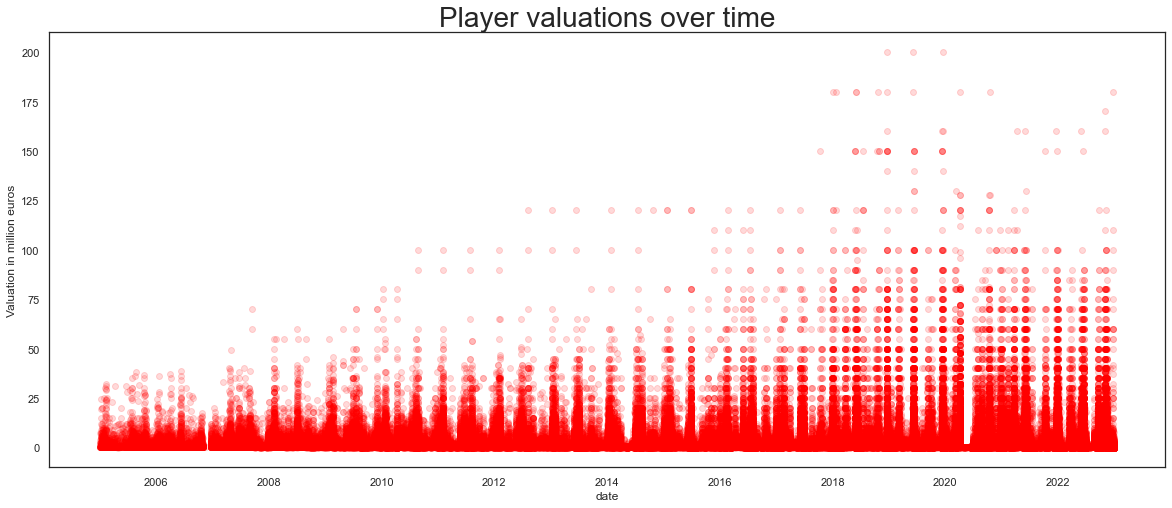

In [88]:
# add year to player valuations
player_valuations['datetime']=pd.to_datetime(player_valuations['datetime'], format="%Y-%m-%d")
player_valuations['year']=player_valuations['datetime'].dt.year

#filter range
player_valuations_df = player_valuations[(player_valuations.year > 2004 ) & (player_valuations.year < 2023 )]
high_value_player_valuations_df = player_valuations_df[(player_valuations_df.market_value_in_eur > 40000000 )]
positions=players['position'].unique()

# Lookat data
#print(player_valuations_df.columns)

# Visualize of valuation data over time
plt.figure(figsize=(20,8))
plt.scatter(player_valuations_df['datetime'],y=player_valuations_df['market_value_in_eur']/1000000, c='red',alpha=0.15)
plt.xlabel('date');plt.ylabel('Valuation in million euros')
plt.title('Player valuations over time',fontsize=28)
plt.show()

## Players

In [89]:
players.head()

,player_id,name,current_club_id,current_club_name,country_of_citizenship,country_of_birth,city_of_birth,date_of_birth,position,sub_position,...,highest_market_value_in_eur,agent_name,contract_expiration_date,current_club_domestic_competition_id,first_name,last_name,player_code,image_url,last_season,url
0,134354,Ian Raeymaekers,498,Ksc Lokeren,Belgium,Belgium,Aalst,1995-01-30,Attack,Centre-Forward,...,50000.0,NaN,NaN,BE1,Ian,Raeymaekers,ian-raeymaekers,https://img.a.transfermarkt.technology/portrai...,2012,https://www.transfermarkt.co.uk/ian-raeymaeker...
1,99946,Mohamed Camara,1095,Es Troyes Ac,Guinea,Guinea,Conakry,1990-09-20,Attack,Centre-Forward,...,300000.0,NaN,NaN,FR1,Mohamed,Camara,mohamed-camara,https://img.a.transfermarkt.technology/portrai...,2012,https://www.transfermarkt.co.uk/mohamed-camara...
2,76948,Pablo Olivera,979,Moreirense Fc,Uruguay,Uruguay,Melo,1987-12-08,Attack,Centre-Forward,...,600000.0,NaN,NaN,PO1,Pablo,Olivera,pablo-olivera,https://img.a.transfermarkt.technology/portrai...,2012,https://www.transfermarkt.co.uk/pablo-olivera/...
3,108372,Aliosman Aydin,38,Fortuna Dusseldorf,Turkey,Germany,Dormagen,1992-02-06,Attack,Centre-Forward,...,125000.0,NaN,NaN,L1,Aliosman,Aydin,aliosman-aydin,https://img.a.transfermarkt.technology/portrai...,2012,https://www.transfermarkt.co.uk/aliosman-aydin...
4,78820,Jaime Alfonso Ruiz,354,Kv Mechelen,Colombia,Colombia,Cali,1984-01-03,Attack,Centre-Forward,...,1700000.0,NaN,NaN,BE1,Jaime Alfonso,Ruiz,jaime-alfonso-ruiz,https://img.a.transfermarkt.technology/portrai...,2012,https://www.transfermarkt.co.uk/jaime-alfonso-...


In [90]:
players = players.drop(columns=['name', 'current_club_name', 'country_of_birth', 'market_value_in_eur', 'highest_market_value_in_eur', 'agent_name', 'city_of_birth', 'first_name', 'last_name', 'player_code', 'image_url', 'url'])
players.head(5)

,player_id,current_club_id,country_of_citizenship,date_of_birth,position,sub_position,foot,height_in_cm,contract_expiration_date,current_club_domestic_competition_id,last_season
0,134354,498,Belgium,1995-01-30,Attack,Centre-Forward,Right,0,NaN,BE1,2012
1,99946,1095,Guinea,1990-09-20,Attack,Centre-Forward,Right,180,NaN,FR1,2012
2,76948,979,Uruguay,1987-12-08,Attack,Centre-Forward,Right,175,NaN,PO1,2012
3,108372,38,Turkey,1992-02-06,Attack,Centre-Forward,Right,178,NaN,L1,2012
4,78820,354,Colombia,1984-01-03,Attack,Centre-Forward,Right,184,NaN,BE1,2012


Filling missing position values

In [91]:
players['sub_position'].fillna(players['position'], inplace=True)
players.drop('position', axis=1, inplace=True)

In [92]:
players['date_of_birth'] = pd.to_datetime(players['date_of_birth'])
players['contract_expiration_date'] = pd.to_datetime(players['contract_expiration_date'])

## Player Valuations

In [93]:
player_valuations.head()

,date,datetime,dateweek,player_id,current_club_id,market_value_in_eur,player_club_domestic_competition_id,year
0,2013-08-07,2013-08-07,2013-08-05,99946,1095,150000,FR1,2013
1,2014-01-13,2014-01-13,2014-01-13,99946,1095,100000,FR1,2014
2,2010-01-29,2010-01-29,2010-01-25,76948,979,125000,PO1,2010
3,2010-08-20,2010-08-20,2010-08-16,76948,979,250000,PO1,2010
4,2011-01-17,2011-01-17,2011-01-17,76948,979,350000,PO1,2011


In [94]:
player_valuations = player_valuations.drop(columns=['date', 'dateweek', 'current_club_id', 'player_club_domestic_competition_id'])
player_valuations.head()

,datetime,player_id,market_value_in_eur,year
0,2013-08-07,99946,150000,2013
1,2014-01-13,99946,100000,2014
2,2010-01-29,76948,125000,2010
3,2010-08-20,76948,250000,2010
4,2011-01-17,76948,350000,2011


In [95]:
player_valuations['datetime'] = pd.to_datetime(player_valuations['datetime'])
player_valuations['year'] = player_valuations['datetime'].dt.year
player_valuations = player_valuations.drop(columns=['datetime'])

player_mean_year_val = player_valuations.groupby(['player_id', 'year'])['market_value_in_eur'].mean().reset_index()
player_mean_year_val

,player_id,year,market_value_in_eur
0,10,2004,7.000000e+06
1,10,2005,1.200000e+07
2,10,2006,2.500000e+07
3,10,2007,2.300000e+07
4,10,2008,2.000000e+07
...,...,...,...
213168,1050249,2022,8.333333e+04
213169,1050852,2022,5.000000e+04
213170,1052404,2022,5.000000e+04
213171,1056907,2022,1.000000e+05


## Appearances

In [96]:
appearances.head(5)

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
0,2483937_52453,2483937,52453,28095,28095,2014-08-08,Haris Handzic,RU1,0,0,0,0,90
1,2479929_67064,2479929,67064,28095,4128,2014-08-03,Felicio Brown Forbes,RU1,0,0,0,0,90
2,2483937_67064,2483937,67064,28095,4128,2014-08-08,Felicio Brown Forbes,RU1,0,0,0,0,90
3,2484582_67064,2484582,67064,28095,4128,2014-08-13,Felicio Brown Forbes,RU1,0,0,0,0,55
4,2485965_67064,2485965,67064,28095,4128,2014-08-16,Felicio Brown Forbes,RU1,0,0,0,0,90


In [97]:
appearances = appearances.drop(columns=['player_name', 'player_current_club_id', 'appearance_id'])
appearances.head(3)

,game_id,player_id,player_club_id,date,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
0,2483937,52453,28095,2014-08-08,RU1,0,0,0,0,90
1,2479929,67064,28095,2014-08-03,RU1,0,0,0,0,90
2,2483937,67064,28095,2014-08-08,RU1,0,0,0,0,90


In [98]:
appearances['date'] = pd.to_datetime(appearances['date'])
appearances['year'] = appearances['date'].dt.year


In [99]:
# Grouped stats by player
players_stats_df = appearances.drop(columns=["game_id", "player_club_id"]).groupby(["player_id", "year"]).sum()
players_stats_df = players_stats_df.reset_index()
players_stats_df.head(5)

,player_id,year,yellow_cards,red_cards,goals,assists,minutes_played
0,10,2014.0,2,0,4,3,496
1,10,2015.0,6,0,12,8,2429
2,10,2016.0,1,0,8,5,1078
3,26,2014.0,0,0,0,0,1530
4,26,2015.0,0,0,0,0,2160


## Clubs

In [100]:
clubs = clubs.drop(columns=['club_code', 'name', 'domestic_competition_id', 'total_market_value', 'squad_size', 'average_age', 'foreigners_number', 'net_transfer_record', 'foreigners_percentage', 'stadium_name', 'coach_name', 'url'])

## Merging Datasets

In [101]:
players = players.merge(players_stats_df, on="player_id", how='inner')
players.head(5)

,player_id,current_club_id,country_of_citizenship,date_of_birth,sub_position,foot,height_in_cm,contract_expiration_date,current_club_domestic_competition_id,last_season,year,yellow_cards,red_cards,goals,assists,minutes_played
0,212852,621,Spain,1995-02-15,Right-Back,Right,178,2023-06-30,ES1,2012,2016.0,0,0,0,0,360
1,79933,1075,Portugal,1989-09-24,Centre-Back,Right,187,NaT,PO1,2012,2014.0,2,0,0,0,1530
2,79933,1075,Portugal,1989-09-24,Centre-Back,Right,187,NaT,PO1,2012,2015.0,2,0,0,0,1055
3,13972,1436,Portugal,1980-04-13,Centre-Back,Right,184,NaT,PO1,2012,2015.0,3,0,0,0,1592
4,13972,1436,Portugal,1980-04-13,Centre-Back,Right,184,NaT,PO1,2012,2016.0,0,0,1,0,226


In [102]:
players = players.merge(player_mean_year_val, on=['player_id', 'year'], how='inner')
players.head(5)

,player_id,current_club_id,country_of_citizenship,date_of_birth,sub_position,foot,height_in_cm,contract_expiration_date,current_club_domestic_competition_id,last_season,year,yellow_cards,red_cards,goals,assists,minutes_played,market_value_in_eur
0,212852,621,Spain,1995-02-15,Right-Back,Right,178,2023-06-30,ES1,2012,2016.0,0,0,0,0,360,433333.333333
1,79933,1075,Portugal,1989-09-24,Centre-Back,Right,187,NaT,PO1,2012,2015.0,2,0,0,0,1055,1000000.000000
2,13972,1436,Portugal,1980-04-13,Centre-Back,Right,184,NaT,PO1,2012,2015.0,3,0,0,0,1592,250000.000000
3,13972,1436,Portugal,1980-04-13,Centre-Back,Right,184,NaT,PO1,2012,2016.0,0,0,1,0,226,200000.000000
4,14511,294,Portugal,1982-04-29,Attacking Midfield,Both,172,NaT,PO1,2012,2015.0,9,0,4,8,2225,800000.000000


Adding Age Feature and dropping DOB

In [103]:
def calculate_age(dob, year):
    return year - dob.year

# drop players with no date of birth (2 records only)
players = players[players['date_of_birth'].isnull() == False]
today = date.today()
players['age'] = players.apply(lambda x: calculate_age(x.date_of_birth, x.year), axis=1)

players = players.drop(columns=['date_of_birth'])


In [104]:
players = pd.merge(players, clubs, left_on=['current_club_id'], right_on=['club_id'], how='inner')
players = players.drop(columns=['current_club_id'])

In [105]:
players['contract_expiration_date'] = players['contract_expiration_date'].dt.year

### Dealing with null values

In [106]:
players = players[players['contract_expiration_date'].isnull() == False]

In [107]:
players['foot'] = players['foot'].fillna('Right')

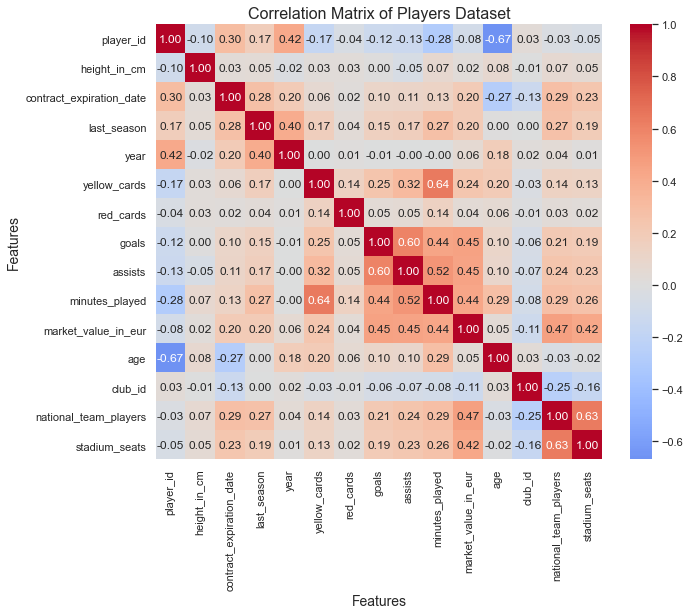

In [108]:
# calculate the correlation matrix
corr_matrix = players.corr()

# create a heatmap with the correlation matrix
sns.set(style='white')
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f', center=0, ax=ax)

# set the plot title and axis labels
ax.set_title('Correlation Matrix of Players Dataset', fontsize=16)
ax.set_xlabel('Features', fontsize=14)
ax.set_ylabel('Features', fontsize=14)

# show the plot
plt.show()

### Encoding values

In [109]:
players = pd.get_dummies(players)

In [110]:
players = players.sort_values(by=['player_id', 'year'])
players.head(5)

,player_id,height_in_cm,contract_expiration_date,last_season,year,yellow_cards,red_cards,goals,assists,minutes_played,...,current_club_domestic_competition_id_GB1,current_club_domestic_competition_id_GR1,current_club_domestic_competition_id_IT1,current_club_domestic_competition_id_L1,current_club_domestic_competition_id_NL1,current_club_domestic_competition_id_PO1,current_club_domestic_competition_id_RU1,current_club_domestic_competition_id_SC1,current_club_domestic_competition_id_TR1,current_club_domestic_competition_id_UKR1
24236,215,193,2023.0,2015,2014.0,0,0,5,1,985,...,0,0,0,0,0,0,0,0,0,0
24237,215,193,2023.0,2015,2015.0,0,0,1,0,221,...,0,0,0,0,0,0,0,0,0,0
24238,215,193,2023.0,2015,2016.0,0,0,2,0,378,...,0,0,0,0,0,0,0,0,0,0
54332,2138,178,2023.0,2017,2014.0,5,0,1,0,1470,...,0,0,0,0,0,0,1,0,0,0
54333,2138,178,2023.0,2017,2015.0,7,0,0,0,1110,...,0,0,0,0,0,0,1,0,0,0


## Regression

In [111]:
#computecost
def computeCost(X,y,theta):
    tobesummed = np.power(((X @ theta.T)-y),2) # @ means matrix multiplication of arrays (Dot product)
    return np.sum(tobesummed)/(2 * len(X))

def gradientDescent(X,y,theta,iters,alpha):
    cost = np.zeros(iters)
    for i in range(iters):
        theta = theta - (alpha/len(X)) * np.sum(X * (X @ theta.T - y), axis=0)
        cost[i] = computeCost(X, y, theta)
    
    return theta,cost

In [112]:
X = players.drop(columns=['market_value_in_eur', 'player_id'])
Y = players['market_value_in_eur']


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict


# Create a LinearRegression model
model = LinearRegression()

scores = cross_val_score(model, X, Y, cv=6, scoring="neg_mean_absolute_error")

print(scores)

[-4920069.31036789 -4447665.47802045 -4193382.75667157 -4153812.47858212
 -4218225.60645368 -3684075.35019401]
